## plot batch vs best value

number exceed initial best 11
Random/round1 last group mean 18.431749999999997
Random/round1 max_value: 52.510999999999974


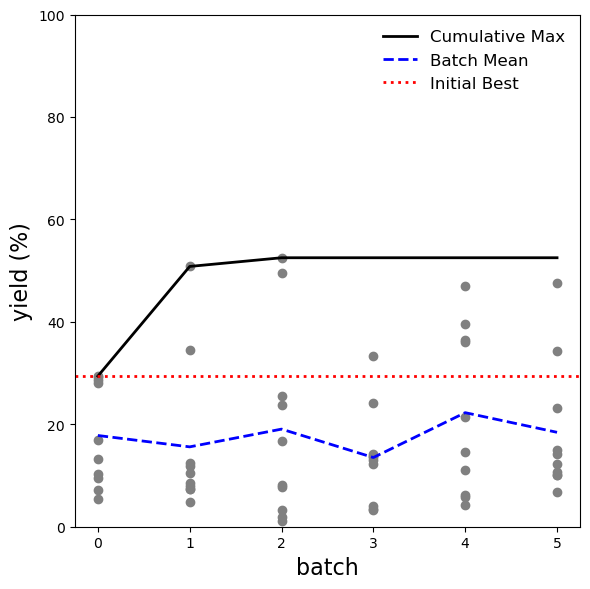

number exceed initial best 13
Random/round2 last group mean 25.639739999999996
Random/round2 max_value: 56.25110000000002


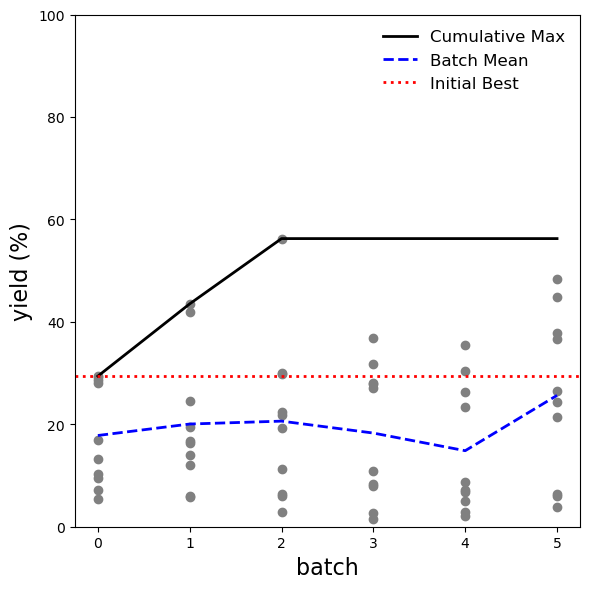

number exceed initial best 8
Random/round3 last group mean 5.959790000000001
Random/round3 max_value: 53.32459999999999


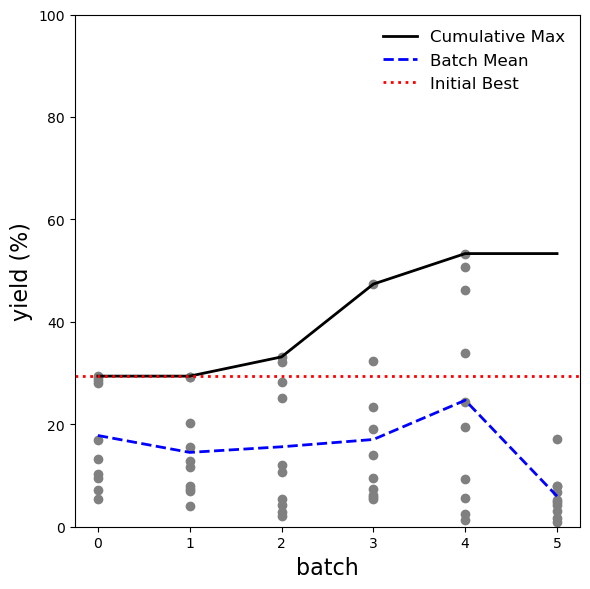

number exceed initial best 11
Random/round4 last group mean 14.555849999999998
Random/round4 max_value: 58.59040000000004


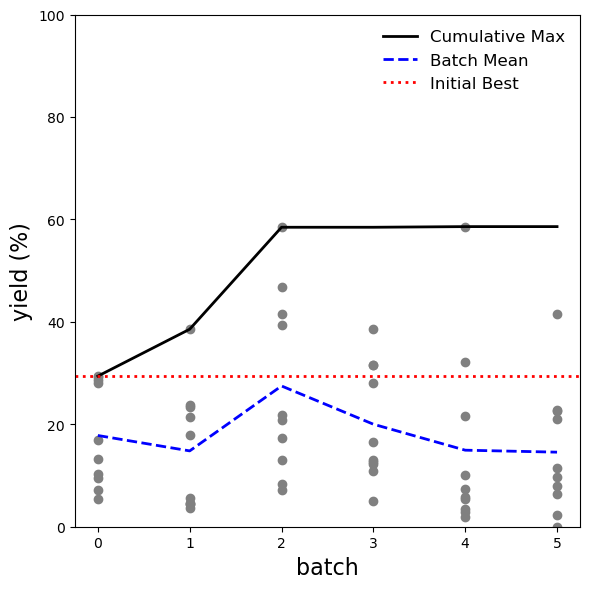

number exceed initial best 8
Random/round5 last group mean 11.909180000000001
Random/round5 max_value: 65.75170000000007


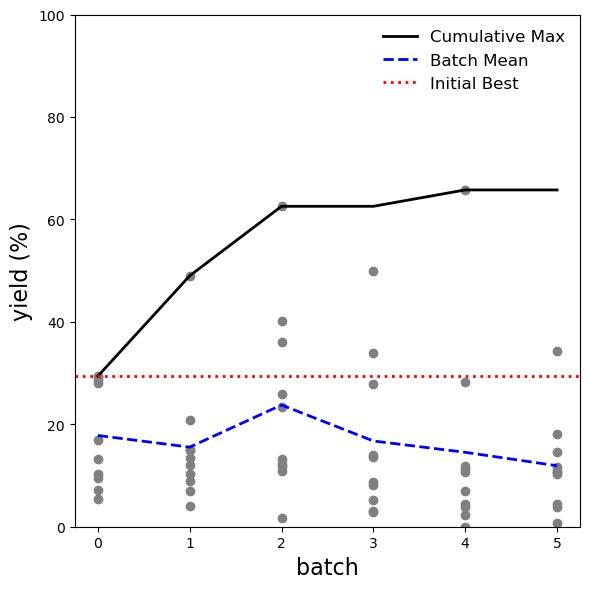

number exceed initial best 13
Random/round6 last group mean 22.501900000000003
Random/round6 max_value: 43.56039999999997


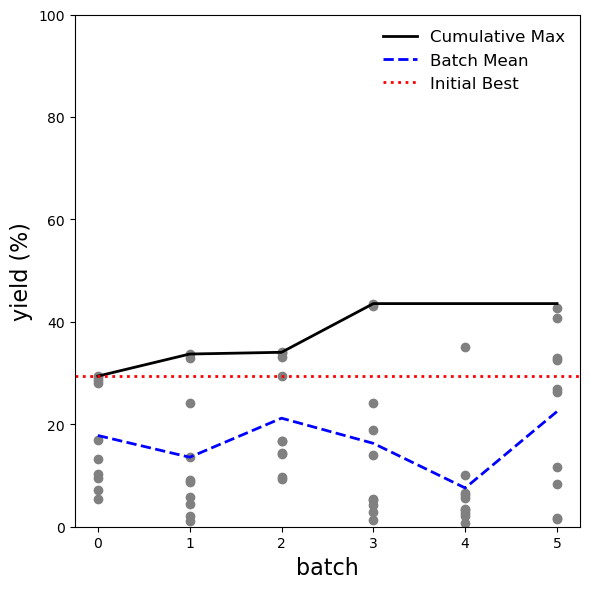

number exceed initial best 12
Random/round7 last group mean 18.57602
Random/round7 max_value: 57.04430000000002


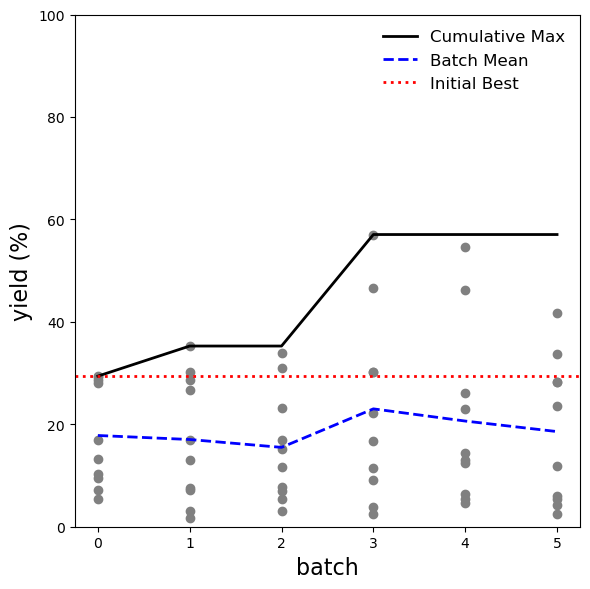

number exceed initial best 8
Random/round8 last group mean 17.69794
Random/round8 max_value: 62.30090000000008


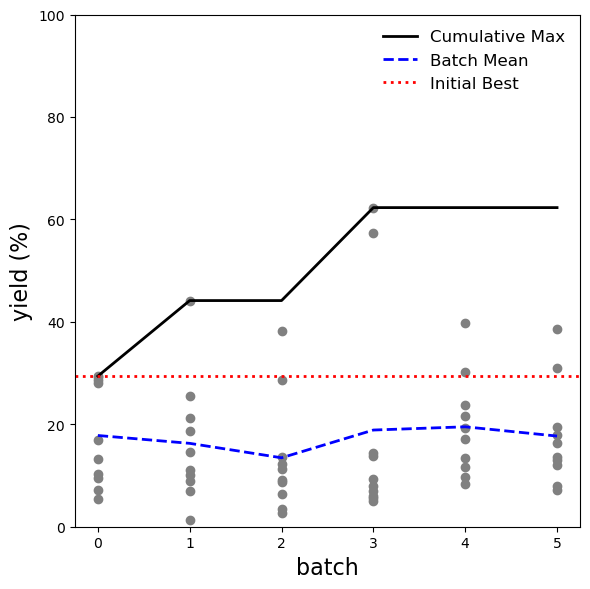

number exceed initial best 5
Random/round9 last group mean 13.658779999999997
Random/round9 max_value: 60.81480000000005


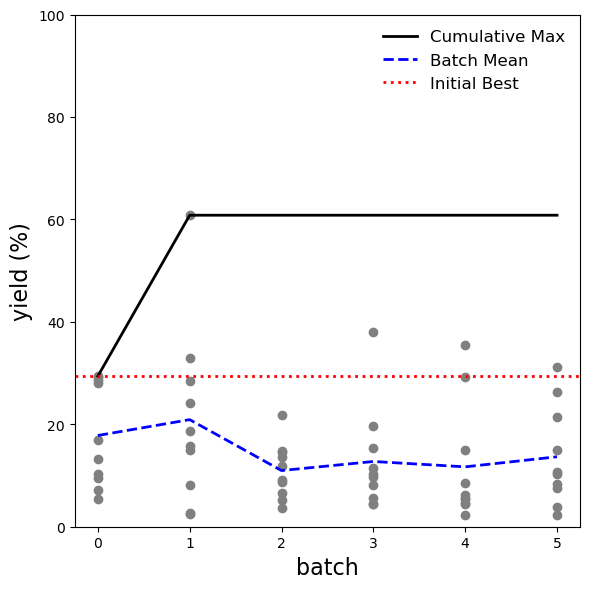

number exceed initial best 5
Random/round10 last group mean 9.509039999999999
Random/round10 max_value: 59.19969999999999


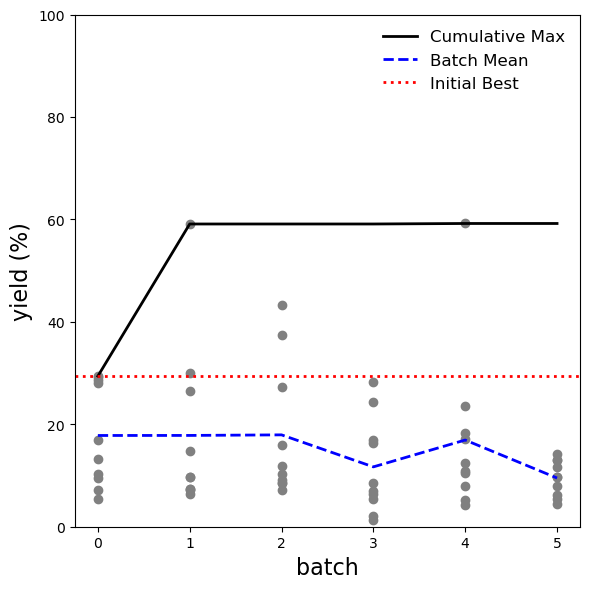

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

methods = ['ABC', 'PSO','Random']
methods = ['PSO/round1','PSO/round2','PSO/round3','PSO/round4','PSO/round5','PSO/round6', 'PSO/round7', 'PSO/round8', 'PSO/round9', 'PSO/round10']
methods = ['Random/round1','Random/round2','Random/round3','Random/round4','Random/round5','Random/round6', 'Random/round7', 'Random/round8', 'Random/round9', 'Random/round10']

#methods = ['ABC_T','PSO']
for method in methods:
    df = pd.read_csv(f'/home/ianlee/opt_ian/Model_Create_and_Results1/Direct_ary/3_Make_New_Data_Predictor/{method}/cycle5.csv')  # 替換成你的檔案路徑

    if 'yield' not in df.columns:
        raise ValueError("欄位 'yield' 不存在於 CSV 中")


    group_size = 10
    groups = [df['yield'][i:i+group_size].values for i in range(0, len(df), group_size)]
    group_mean = [sum(g)/len(g) for g in groups]

    initial_best = max(groups[0])
    print('number exceed initial best', (df['yield']>initial_best).sum())

    print(method, 'last group mean', group_mean[-1])
    num_groups = len(groups)

    group_max = [max(g) for g in groups]
    cumulative_max = [max(group_max[:i+1]) for i in range(len(group_max))]

    print(method, 'max_value:', max(cumulative_max))


    plt.figure(figsize=(6, 6))
    plt.ylim(top=100.0)

    for i, group in enumerate(groups):
        x = [i] * len(group)
        plt.scatter(x, group, color='grey')


    plt.plot(range(num_groups), cumulative_max, color='black', linewidth=2, label='Cumulative Max')

    plt.plot(range(num_groups), group_mean, color='blue', linewidth=2, linestyle='--', label='Batch Mean')

    initial_best = group_max[0]  
    plt.axhline(y=initial_best, color='red', linestyle=':', linewidth=2, label='Initial Best')

    ax = plt.gca()
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))  

 
    plt.xlabel('batch', fontsize=16)
    plt.ylabel('yield (%)', fontsize=16)
    #plt.title(method)
    plt.legend(frameon=False, fontsize=12)
    plt.grid(False)
    plt.tight_layout()
    plt.show()


## Mean metric

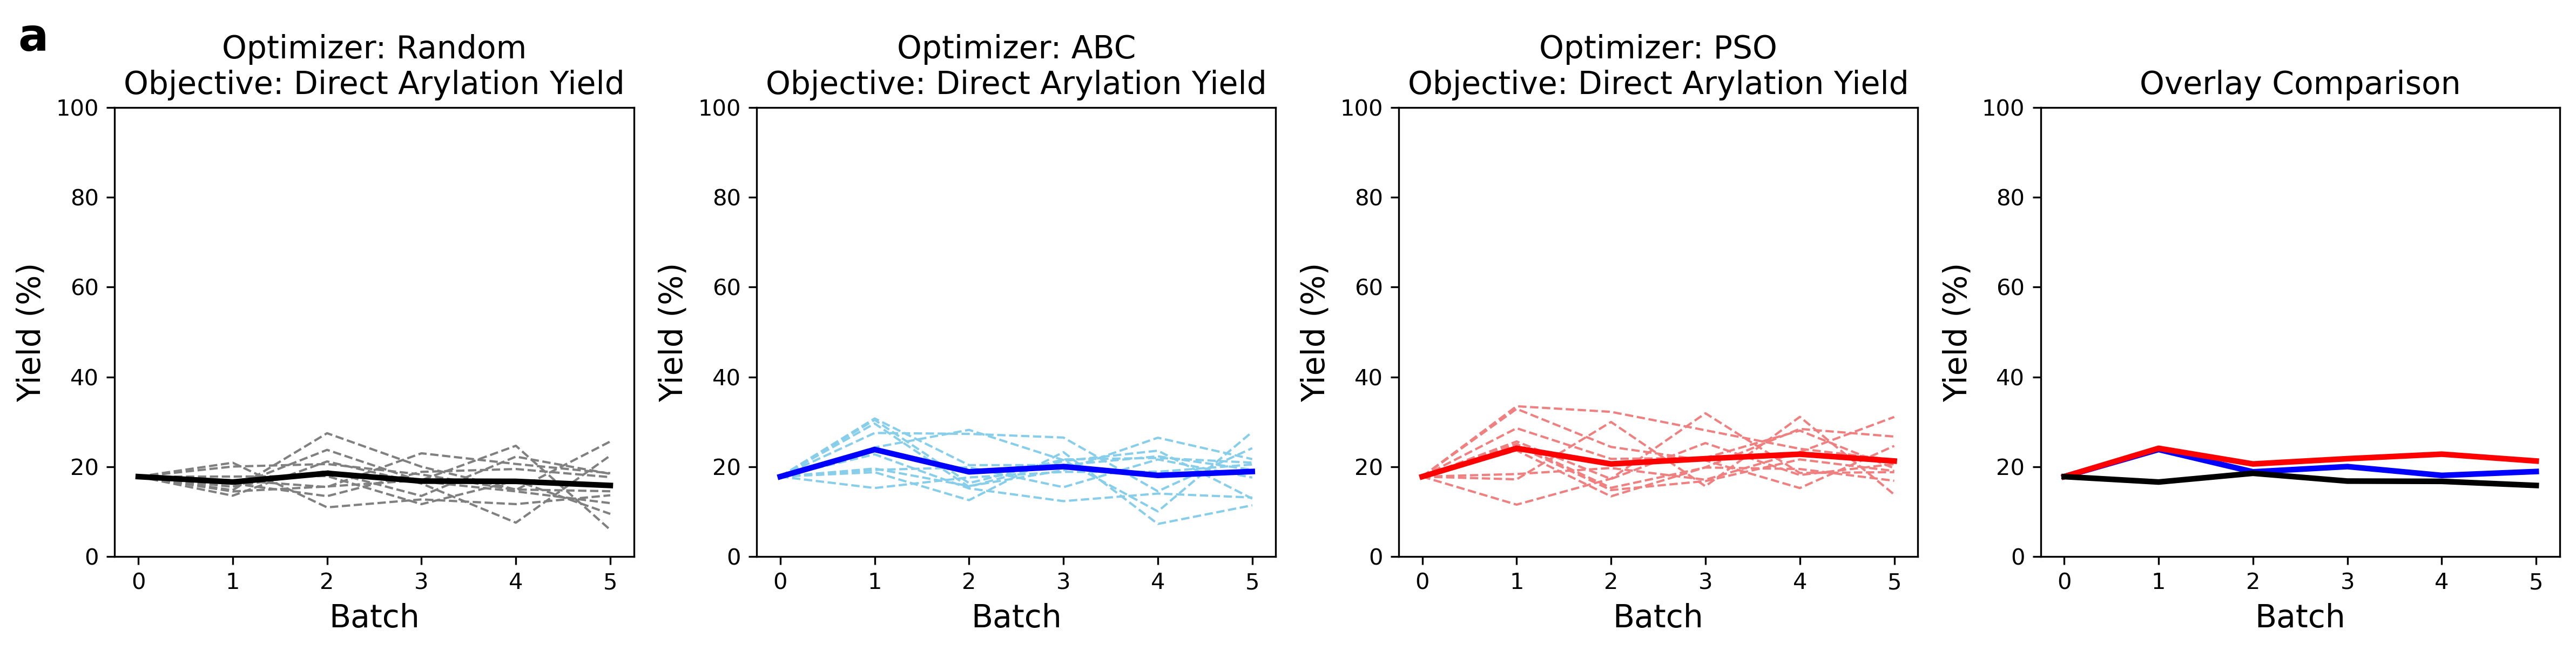

In [8]:
# 5 cycles mean
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np

methods = ['ABC','PSO','Random']
rounds = ['round1', 'round2', 'round3', 'round4', 'round5', 'round6','round7','round8','round9','round10']
seq = {'ABC':1, 'PSO':2,'Random':0}

#methods = ['ABC']
meann = {}

color = {'ABC':'skyblue', 'PSO':'lightcoral','Random':'grey'}
colorr = {'ABC':'blue', 'PSO':'red','Random':'black'}

fig, axs = plt.subplots(1, 4, figsize=(16, 4),dpi = 300)
axs = axs.flatten()

for method in methods:
    mean = {}
    for roundn in rounds:
        # 讀取 CSV
        df = pd.read_csv(f'/home/ianlee/opt_ian/Model_Create_and_Results1/Direct_ary/3_Make_New_Data_Predictor/{method}/{roundn}/cycle5.csv')  # 替換成你的檔案路徑

        # 檢查欄位
        if 'yield' not in df.columns:
            raise ValueError("欄位 'crystal_size' 不存在於 CSV 中")

        # 分組
        group_size = 10
        groups = [df['yield'][i:i+group_size].values for i in range(0, len(df), group_size)]
        group_mean = [sum(g)/len(g) for g in groups]
        mean[roundn] = group_mean

    meann[method] = mean
    # 將所有 list 轉成 numpy array
    all_lists = np.array(list(mean.values()))  # shape: (5, n)

    x = np.arange(0, all_lists.shape[1])

    # 畫出每條虛線（較淺的顏色）
    for lst in all_lists:
        axs[seq[method]].plot(x, lst, linestyle='--', linewidth=1, color=color[method])

    # 計算平均值並畫出粗線
    mean_values = np.mean(all_lists, axis=0)
    axs[seq[method]].plot(x, mean_values, color=colorr[method], linewidth=2.5, label=method)

    # 加上標籤與圖例

    axs[seq[method]].set_title('Optimizer: '+method+'\nObjective: Direct Arylation Yield', fontsize = 14)
    axs[seq[method]].set_xlabel('Batch', fontsize = 14)
    axs[seq[method]].set_ylabel('Yield (%)', fontsize = 14)
    axs[seq[method]].set_ylim(0,100)


dict1 = meann['ABC']
dict2 = meann['PSO']
dict3 = meann['Random']

# 將 dictionary 轉為 numpy array
arr1 = np.array(list(dict1.values()))
arr2 = np.array(list(dict2.values()))
arr3 = np.array(list(dict3.values()))

x = np.arange(0, arr1.shape[1])


# 平均線（深藍色與深紅色）
mean1 = np.mean(arr1, axis=0)
mean2 = np.mean(arr2, axis=0)
mean3 = np.mean(arr3, axis=0)


axs[3].plot(x, mean1, color='blue', linewidth=2.5, label='ABC')
axs[3].plot(x, mean2, color='red', linewidth=2.5, label='PSO')
axs[3].plot(x, mean3, color='black', linewidth=2.5, label='Random')

fig.text(0.01, 0.99, 'a', fontsize=20, fontweight='bold',
         va='top', ha='left')

# 加標籤、圖例、標題
plt.xlabel('Batch', fontsize = 14)
plt.ylabel('Yield (%)', fontsize = 14)
plt.title('Overlay Comparison', fontsize = 14)
plt.ylim(0,100)
plt.grid(False)
plt.tight_layout()
plt.savefig('/home/ianlee/opt_ian/Model_Create_and_Results1/Direct_ary/4_Final_Anslysis_Like_EDBO/mean/overall.jpeg')
plt.show()

## Cumulative best metric

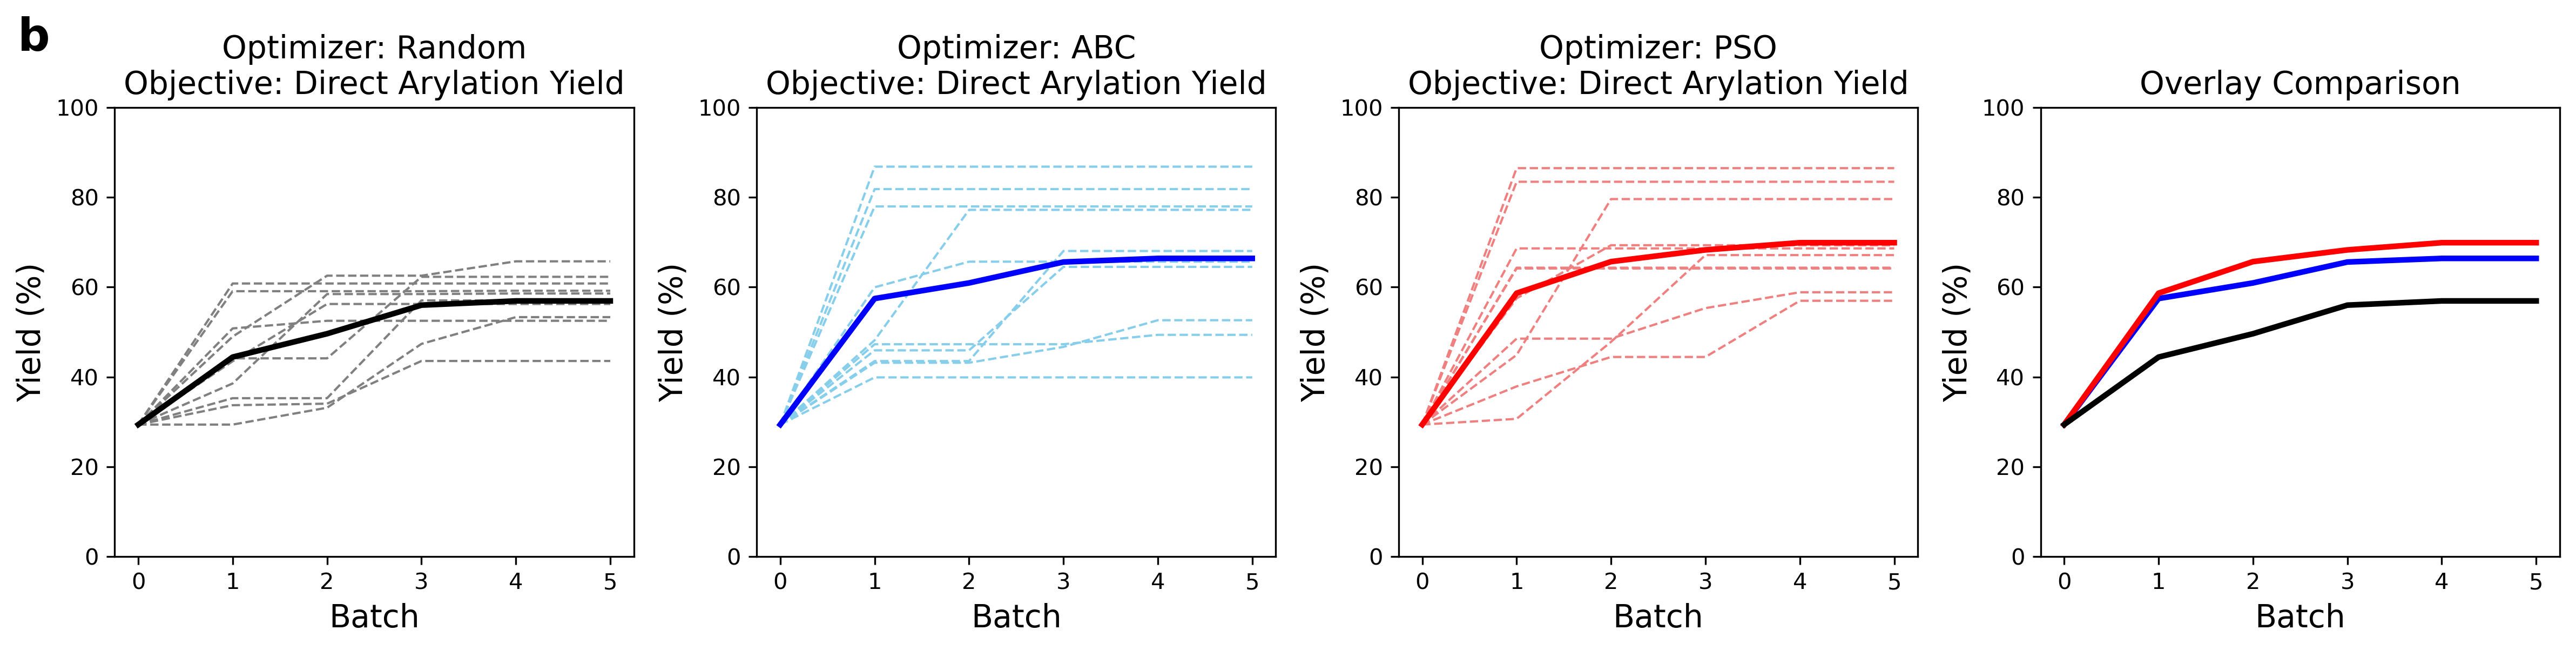

In [9]:
# 5 cycles best
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
methods = ['ABC','PSO','Random']
rounds = ['round1', 'round2', 'round3', 'round4', 'round5', 'round6','round7','round8','round9','round10']


bestnn = {}

methods = ['ABC','PSO','Random']
seq = {'ABC':1, 'PSO':2,'Random':0}

color = {'ABC':'skyblue', 'PSO':'lightcoral','Random':'grey'}
colorr = {'ABC':'blue', 'PSO':'red','Random':'black'}

fig, axs = plt.subplots(1, 4, figsize=(16, 4),dpi = 300)
axs = axs.flatten()

for method in methods:
    best = {}
    for roundn in rounds:

        df = pd.read_csv(f'/home/ianlee/opt_ian/Model_Create_and_Results1/Direct_ary/3_Make_New_Data_Predictor/{method}/{roundn}/cycle5.csv')


        if 'yield' not in df.columns:
            raise ValueError("欄位 'crystal_size' 不存在於 CSV 中")

   
        group_size = 10
        groups = [df['yield'][i:i+group_size].values for i in range(0, len(df), group_size)]
        group_max = [max(g) for g in groups]
        cumulative_max = [max(group_max[:i+1]) for i in range(len(group_max))]
        best[roundn] = cumulative_max
        
    bestnn[method] = best    

    all_lists = np.array(list(best.values()))  # shape: (5, n)


    x = np.arange(0, all_lists.shape[1])

    for lst in all_lists:
        axs[seq[method]].plot(x, lst, linestyle='--', linewidth=1, color=color[method])


    mean_values = np.mean(all_lists, axis=0)
    axs[seq[method]].plot(x, mean_values, color=colorr[method], linewidth=2.5, label=method)



    axs[seq[method]].set_title('Optimizer: '+method+'\nObjective: Direct Arylation Yield', fontsize = 14)
    axs[seq[method]].set_xlabel('Batch', fontsize = 14)
    axs[seq[method]].set_ylabel('Yield (%)', fontsize = 14)
    axs[seq[method]].set_ylim(0,100)

dict1 = bestnn['ABC']
dict2 = bestnn['PSO']
dict3 = bestnn['Random']

max_ABC = np.array([v[-1] for v in dict1.values()])
max_PSO = np.array([v[-1] for v in dict2.values()])
max_Random = np.array([v[-1] for v in dict3.values()])

arr1 = np.array(list(dict1.values()))
arr2 = np.array(list(dict2.values()))
arr3 = np.array(list(dict3.values()))

x = np.arange(0, arr1.shape[1])

mean1 = np.mean(arr1, axis=0)
mean2 = np.mean(arr2, axis=0)
mean3 = np.mean(arr3, axis=0)

axs[3].plot(x, mean1, color='blue', linewidth=2.5, label='ABC')
axs[3].plot(x, mean2, color='red', linewidth=2.5, label='PSO')
axs[3].plot(x, mean3, color='black', linewidth=2.5, label='Random')

fig.text(0.01, 0.99, 'b', fontsize=20, fontweight='bold',
         va='top', ha='left')

plt.xlabel('Batch', fontsize = 14)
plt.ylabel('Yield (%)', fontsize = 14)
plt.title('Overlay Comparison', fontsize = 14)
plt.ylim(0,100)
plt.grid(False)
plt.tight_layout()
plt.savefig('/home/ianlee/opt_ian/Model_Create_and_Results1/Direct_ary/4_Final_Anslysis_Like_EDBO/best/overall.jpeg')
plt.show()


## t-test for Cumulative Best

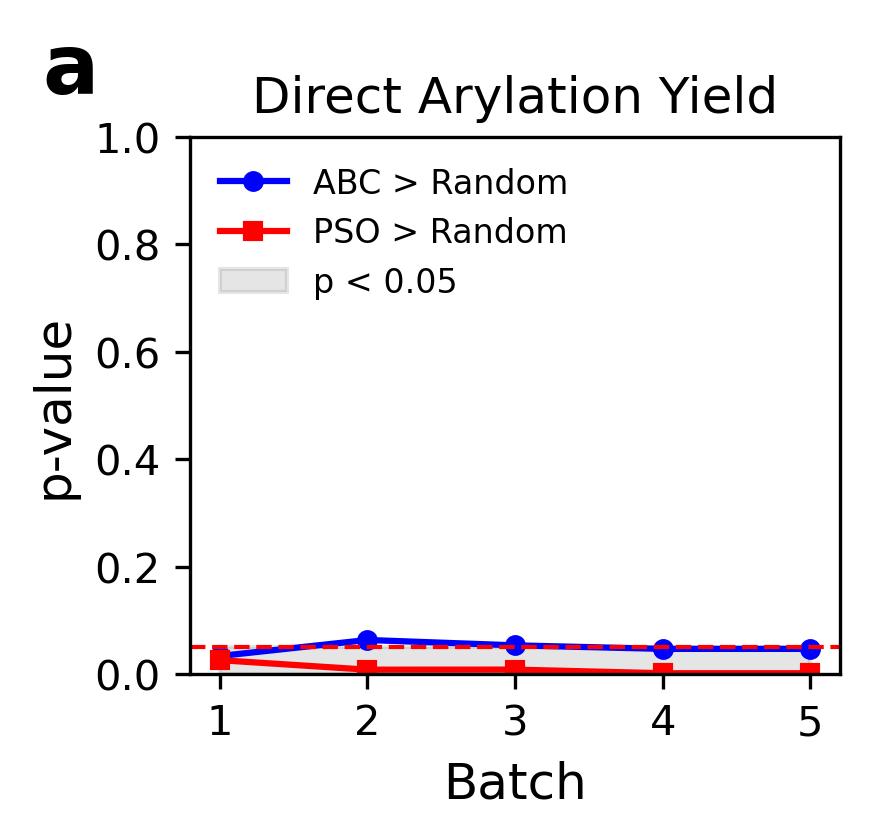

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

n_batch = 5  
pvals_1vs2 = []
pvals_1vs3 = []

for i in range(n_batch):
    # arr1 vs arr2
    t_stat_12, p_val_12 = ttest_ind(arr1[:, i+1], arr3[:, i+1], equal_var=False)
    pvals_1vs2.append(p_val_12 / 2)
    
    # arr1 vs arr3
    t_stat_13, p_val_13 = ttest_ind(arr2[:, i+1], arr3[:, i+1], equal_var=False)
    pvals_1vs3.append(p_val_13 / 2)

pvals_1vs2 = np.array(pvals_1vs2)
pvals_1vs3 = np.array(pvals_1vs3)


x = np.arange(1, n_batch + 1)

plt.figure(figsize=(3, 3),dpi = 300)


plt.plot(x, pvals_1vs2, label='ABC > Random', color='blue', marker='o', markersize=4)
plt.plot(x, pvals_1vs3, label='PSO > Random', color='red', marker='s', markersize=4)

plt.axhline(0.05, color='red', linestyle='--', linewidth=1)

sig_mask = (pvals_1vs2 < 0.05) | (pvals_1vs3 < 0.05)
plt.fill_between(x, 0, 0.05, where=sig_mask, color='gray', alpha=0.2, label='p < 0.05')

plt.text(-0.2, 1.2, 'a', fontsize=20, fontweight='bold',
         va='top', ha='left')

plt.xlabel('Batch', fontsize=12)
plt.ylabel('p-value', fontsize=12)
plt.title('Direct Arylation Yield', fontsize=12)
plt.ylim(0, 1)
plt.xticks(x)
plt.legend(frameon = False, fontsize = 8, loc='upper left')
plt.tight_layout()
plt.savefig('/home/ianlee/opt_ian/Model_Create_and_Results1/Direct_ary/4_Final_Anslysis_Like_EDBO/best_pvalue.jpeg')
plt.show()


## exceeds initial best analysis

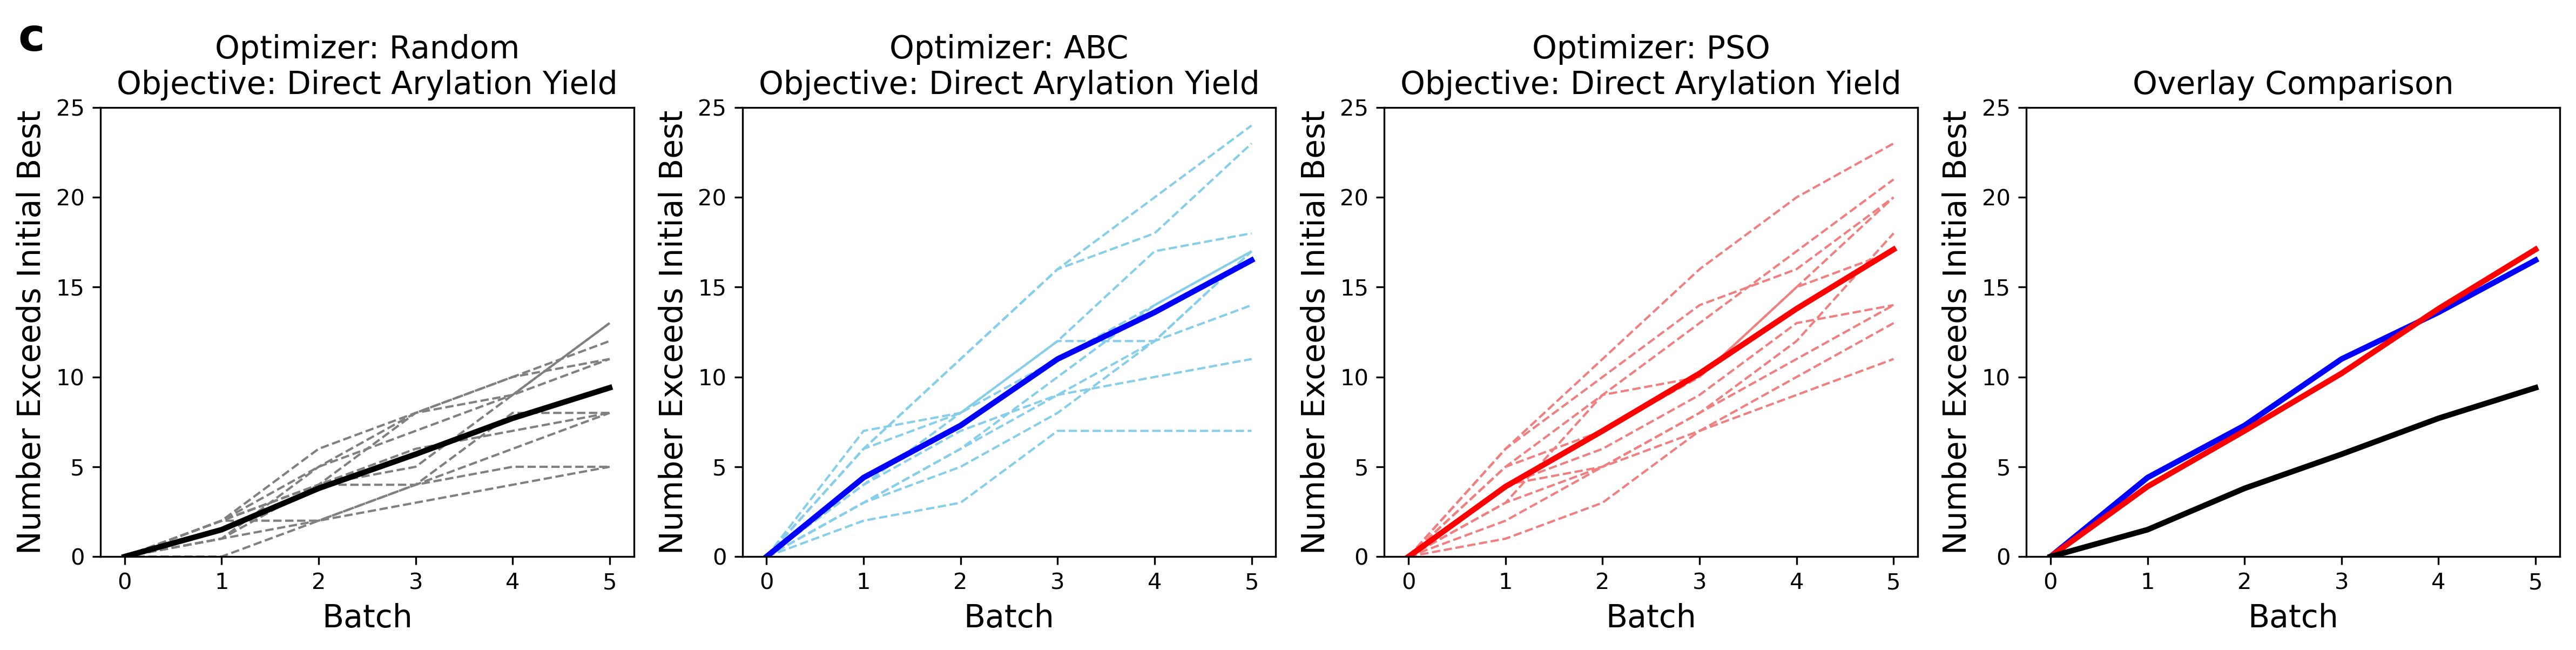

In [11]:
# 5 cycles mean
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np

methods = ['ABC','PSO','Random']
seq = {'ABC':1, 'PSO':2,'Random':0}
rounds = ['round1', 'round2', 'round3', 'round4', 'round5', 'round6','round7','round8','round9','round10']

#rounds = ['round1', 'round2', 'round3', 'round4', 'round5']
#methods = ['ABC']
eibestnn = {}

fig, axs = plt.subplots(1, 4, figsize=(16, 4),dpi = 300)
axs = axs.flatten()

for method in methods:
    eibest = {}
    for roundn in rounds:
        # 讀取 CSV
        df = pd.read_csv(f'/home/ianlee/opt_ian/Model_Create_and_Results1/Direct_ary/3_Make_New_Data_Predictor/{method}/{roundn}/cycle5.csv')  

        # 檢查欄位
        if 'yield' not in df.columns:
            raise ValueError("欄位 'crystal_size' 不存在於 CSV 中")

        # 分組
        group_size = 10
        groups = [df['yield'][i:i+group_size].values for i in range(0, len(df), group_size)]
        group_max = [max(g) for g in groups]
        initial_best = max(groups[0])
        exceeds_initial = []
        ex_init = 0
        for group in groups:
            ex_init += (group > initial_best).sum()
            exceeds_initial.append(ex_init)
        #cumulative_max = [max(group_max[:i+1]) for i in range(len(group_max))]
        eibest[roundn] = exceeds_initial
        
    eibestnn[method] = eibest    

    all_lists = np.array(list(eibest.values()))  # shape: (5, n)

    x = np.arange(0, all_lists.shape[1])

    for lst in all_lists:
        axs[seq[method]].plot(x, lst, linestyle='--', linewidth=1, color=color[method])

    mean_values = np.mean(all_lists, axis=0)
    axs[seq[method]].plot(x, mean_values, color=colorr[method], linewidth=2.5, label=method)


    axs[seq[method]].set_title('Optimizer: '+method+'\nObjective: Direct Arylation Yield', fontsize = 14)
    axs[seq[method]].set_xlabel('Batch', fontsize = 14)
    axs[seq[method]].set_ylabel('Number Exceeds Initial Best', fontsize = 14)
    axs[seq[method]].set_ylim(0,25)


dict1 = eibestnn['ABC']
dict2 = eibestnn['PSO']
dict3 = eibestnn['Random']

maxn_ABC = np.array([v[-1] for v in dict1.values()])
maxn_PSO = np.array([v[-1] for v in dict2.values()])
maxn_Random = np.array([v[-1] for v in dict3.values()])


arr1 = np.array(list(dict1.values()))
arr2 = np.array(list(dict2.values()))
arr3 = np.array(list(dict3.values()))

x = np.arange(0, arr1.shape[1])


mean1 = np.mean(arr1, axis=0)
mean2 = np.mean(arr2, axis=0)
mean3 = np.mean(arr3, axis=0)


axs[3].plot(x, mean1, color='blue', linewidth=2.5, label='ABC')
axs[3].plot(x, mean2, color='red', linewidth=2.5, label='PSO')
axs[3].plot(x, mean3, color='black', linewidth=2.5, label='Random')

fig.text(0.01, 0.99, 'c', fontsize=20, fontweight='bold',
         va='top', ha='left')


plt.xlabel('Batch', fontsize = 14)
plt.ylabel('Number Exceeds Initial Best', fontsize = 14)
plt.title('Overlay Comparison', fontsize = 14)
plt.ylim(0,25)
plt.grid(False)
plt.tight_layout()
plt.savefig('/home/ianlee/opt_ian/Model_Create_and_Results1/Direct_ary/4_Final_Anslysis_Like_EDBO/exib/overall.jpeg')
plt.show()

